In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

Let's read the train data and see the basic statistical characteristics like standard deviation, percentiles, min/max/average.

Training data dimensions: 1460 data points X 81 features


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Most important columns=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']


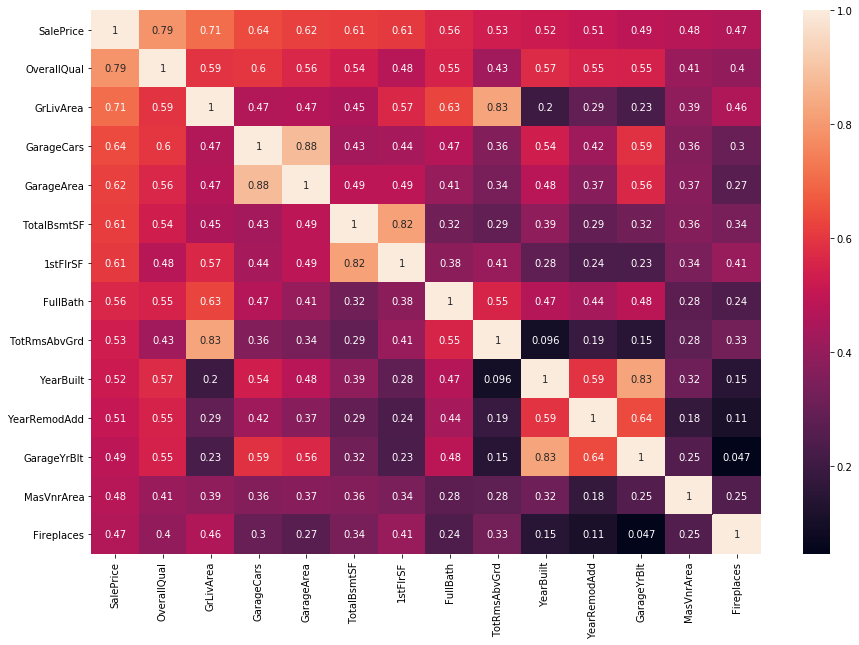

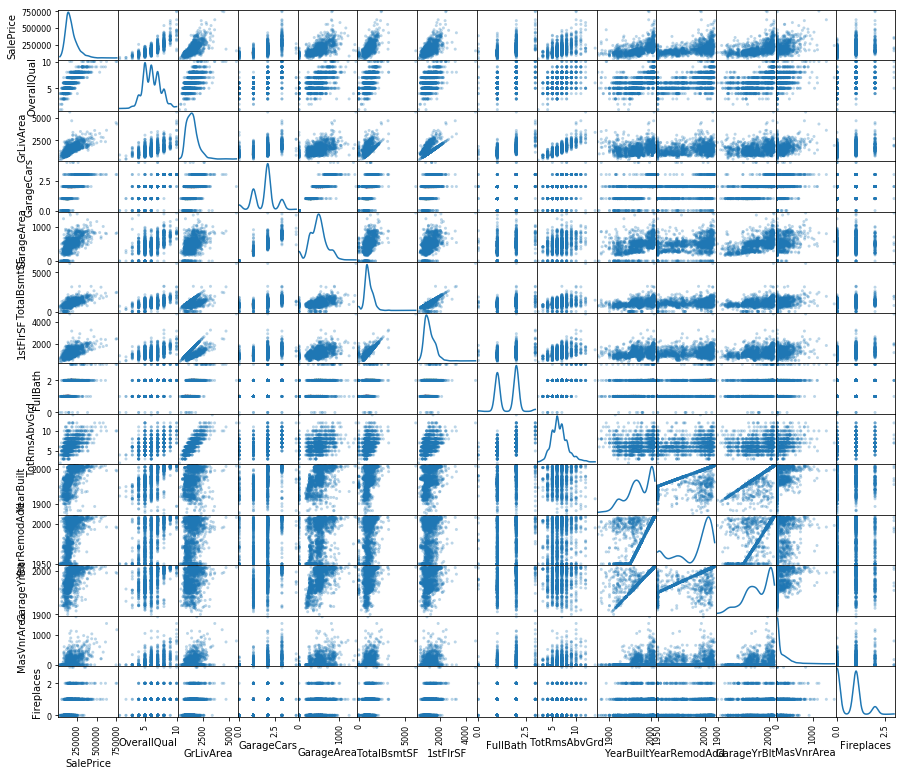

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
from IPython.display import display
import math

# read training data
data_train = pd.read_csv("../input/train.csv")

# read testing data
data_test = pd.read_csv("../input/test.csv")

# print some basic dataset characteristics
print("Training data dimensions: {} data points X {} features".format(*data_train.shape))
display(data_train.head())
display(data_train.describe())

from pandas.plotting import scatter_matrix

import seaborn as sbrn
import matplotlib.pyplot as plt

def get_most_important_columns_corr(data):
    """
    Gets the most important columns from correlation matrix
    """
    #get only maximum correlation
    data_corr = data.corr()
    data_corr.sort_values(["SalePrice"], ascending = False, inplace = True)
    most_important_columns = list()
    for k, v in data_corr["SalePrice"].items():
        if abs(v) > 0.4:
            most_important_columns.append(k)
    print("Most important columns={}".format(most_important_columns))
            
    return most_important_columns

# ------- heat map and scatter matrix of most important columns --------------------------------------

def draw_heatmap_scatter_matrix(data):
    """
    Draw a heatmap and a scatter matrix for a given data
    """
    fig, ax = plt.subplots(figsize=(15,10))
    # heatmap
    sbrn.heatmap(data.corr(), annot=True, ax=ax)
    # scatter matrix
    scatter_matrix(data, alpha = 0.3, figsize = (15,13), diagonal = 'kde');
    plt.show()

def draw_histogram(data, feature):
    print(feature)
#     sbrn.distplot(data[feature])
    plt.hist(data[feature], bins=100)
#     range=(20000, data[feature].max())
    plt.show()    

# --------------------------------------
    
most_important_columns = get_most_important_columns_corr(data_train)
data_train_most_important_columns = data_train[most_important_columns]
draw_heatmap_scatter_matrix(data_train_most_important_columns)

# --------------------------------------


Preprocess the data.

In [3]:
y = data_train["SalePrice"]
data_train = data_train.drop("SalePrice", axis = 1)

def fillna_with_averages(data):
    # Fill data with averages 
    print("")
    print("Filling missing data with mean value ..")
    data = data.fillna(data.mean())

    return data

def one_hot(data):
    # One-hot encoding
    print("")
    print("Performing one hot encoding for categorical features ..")
    data = pd.get_dummies(data)
    # print("data_one_hot.head():")
    # display(data.head())
    
    return data

def reduce_to_common_columns(data_train, data_test):
    # Columns intersection
    columns_intersection = data_train.columns.intersection(data_test.columns)
    # Columns in data not in data_test
    columns_data_not_datatest = data_train.columns.difference(data_test.columns)
    # Columns in data_test not in data
    columns_datatest_not_data = data_test.columns.difference(data_train.columns)

    # Get only columns which are present in both datasets: train and test
    data_train = data_train[columns_intersection]
    data_test = data_test[columns_intersection]    
    
    return data_train, data_test
    
def preprocess_data_step_1(data_train, data_test):

    data_train = fillna_with_averages(data_train)
    data_train = one_hot(data_train)
    
    data_test = fillna_with_averages(data_test)
    data_test = one_hot(data_test)

    data_train, data_test = reduce_to_common_columns(data_train, data_test)
    
    return data_train, data_test

data_train_prep, data_test_prep = preprocess_data_step_1(data_train, data_test)



Filling missing data with mean value ..

Performing one hot encoding for categorical features ..

Filling missing data with mean value ..

Performing one hot encoding for categorical features ..


Divide a data into training/test.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_train_prep, y, test_size = 0.25, random_state = 42)

Build a simplest model = LinearRegression and evaluate it.

In [5]:
# Start with LinearRegression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#without transforming price to logarithm
# regressor.fit(X_train, y_train)

def predict_and_fix(model, X):
    """
    Predict with the given model and fix negative labels to 0.
    """
    y_pred = model.predict(X)
#     print("predict_and_fix(): y_pred.shape[0]={}, X_test.shape[0]={}".format(y_pred.shape[0], X.shape[0]))
    
    # correct predictions: fix negatives
    y_pred = np.clip(y_pred, a_min=0, a_max=None)
    
    return y_pred

# y_pred_test = predict_and_fix(regressor, X_test)

def plot_ytest_ypred(y_test, y_pred, title):
    """
    Plot y_test and y_pred together
    """
    plt.scatter(y_test, y_pred, c = "blue", marker = "s", label = "Test data")
#     plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title(title)
#     plt.xlabel("y_test")
#     plt.ylabel("y_pred - y_test")
#     plt.legend(loc = "upper left")
    plt.show()    

# plot_ytest_ypred(y_test, y_pred_test - y_test, "Test value and pred-vs-test delta")
# plot_ytest_ypred(y_test, y_pred_test, "Test value and pred value")

# print("")
# print("y_test:")
# display(pd.DataFrame(y_test).describe())

# print("")
# print("y_pred_test:")
# display(pd.DataFrame(y_pred_test).describe())

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score

def print_metrics(y_pred, y_test, caption):
    print("")
    print("-- {} --".format(caption))
#     print("RMSE={:.5f}".format(mean_squared_error(y_test, y_pred) ** 0.5))
    print("root_mean_squared_log_error={:.5f}".format(mean_squared_log_error(y_test, y_pred) ** 0.5))
    print("Mean Abs Error={:.5f}".format(mean_absolute_error(y_test, y_pred)))
    print("R2 score={:.5f}".format(r2_score(y_test, y_pred)))

# transforming price to log and train a model on it
print("")
print("Transforming price to log and train a model on it ..")

y_log = np.log1p(y)
X_train, X_test, y_train_log, y_test_log = train_test_split(data_train_prep, y_log, test_size = 0.25, random_state = 42)

regressor.fit(X_train, y_train_log)
y_pred_test_log = predict_and_fix(regressor, X_test)
y_pred_train_log = predict_and_fix(regressor, X_train)

# Transforming price back to normal (logarithmed value to exp) for calculating metrics ..
print("")
print("Transforming price back to normal (logarithmed value to exp) for calculating metrics ..")

y_pred_test_abs = np.expm1(y_pred_test_log)
y_pred_train_abs = np.expm1(y_pred_train_log)
y_test_abs = np.expm1(y_test_log)
y_train_abs = np.expm1(y_train_log)

print_metrics(y_pred_test_abs, y_test_abs, "LinearRegression log, y_test")
print_metrics(y_pred_train_abs, y_train_abs, "LinearRegression log, y_train")

# -------------- Try another model, AdaBoostRegressor --------------------------
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), n_estimators=200, learning_rate=0.5,
                              loss="square", random_state=42)




Transforming price to log and train a model on it ..

Transforming price back to normal (logarithmed value to exp) for calculating metrics ..

-- LinearRegression log, y_test --
root_mean_squared_log_error=0.14651
Mean Abs Error=16541.24322
R2 score=0.91102

-- LinearRegression log, y_train --
root_mean_squared_log_error=0.09901
Mean Abs Error=12518.92826
R2 score=0.93668



Fill NA more carefully ..
columns with more than 10% NA=Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

Filling missing data with mean value ..
columns with more than 10% NA=Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
       'LotFrontage'],
      dtype='object')

Filling missing data with mean value ..
Histograms for most important features=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']
OverallQual


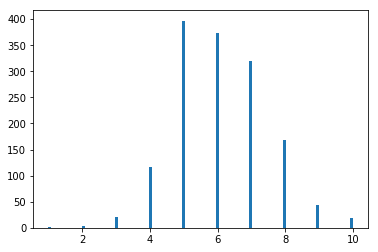

GrLivArea


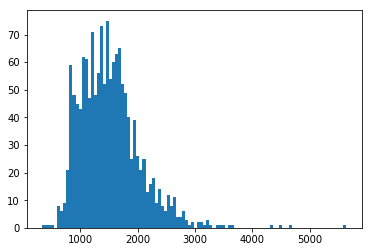

GarageCars


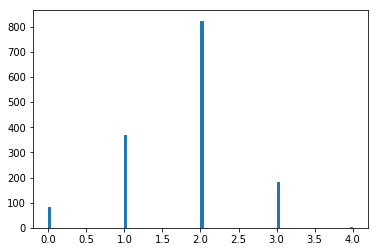

GarageArea


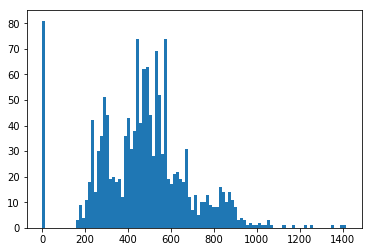

TotalBsmtSF


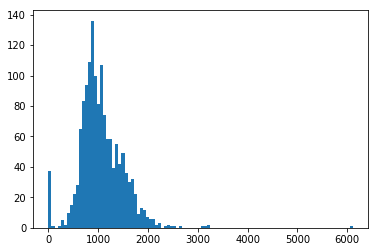

1stFlrSF


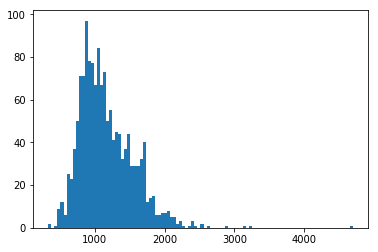

FullBath


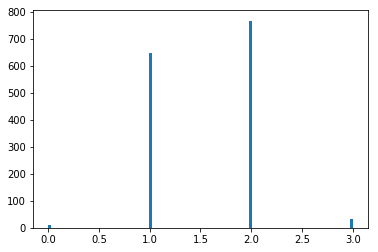

TotRmsAbvGrd


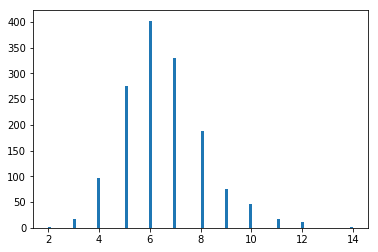

YearBuilt


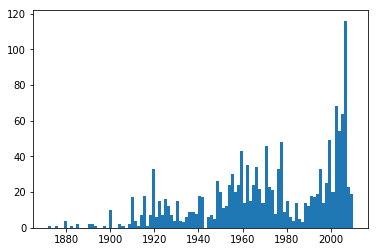

YearRemodAdd


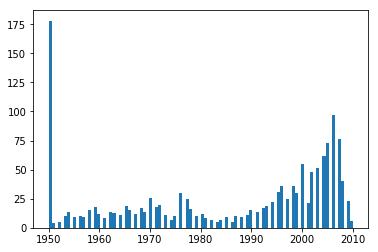

GarageYrBlt


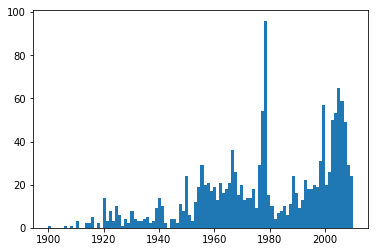

MasVnrArea


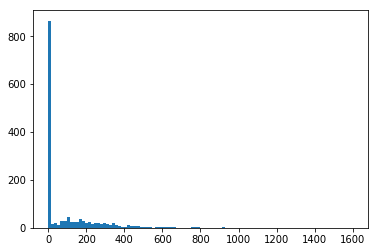

Fireplaces


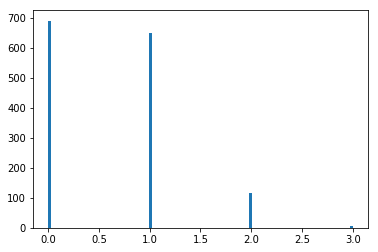

Manually selected features that requre tran to log=['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'GarageYrBlt', 'MasVnrArea']
Transforming manually selected features to log ..
Histograms for manually selected features=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea', 'Fireplaces']
GrLivArea


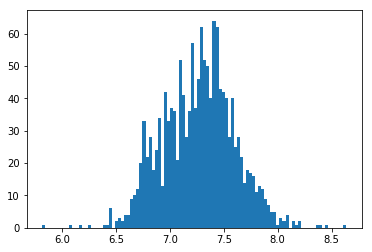

GarageArea


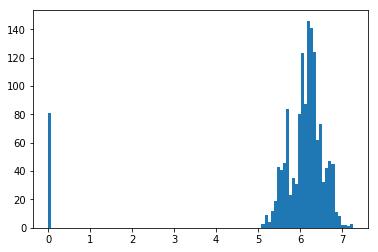

TotalBsmtSF


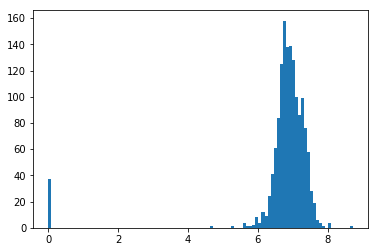

1stFlrSF


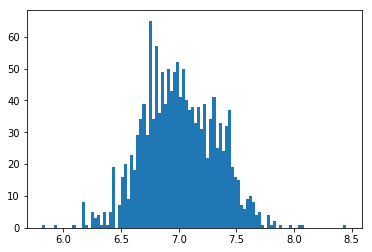

YearBuilt


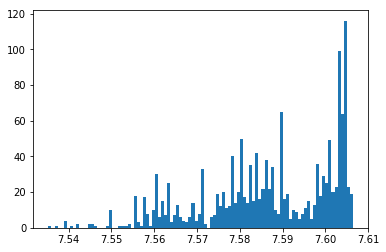

GarageYrBlt


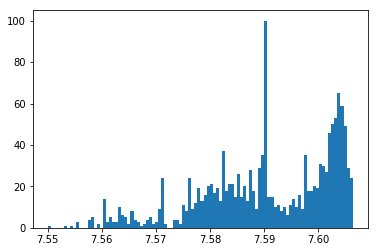

MasVnrArea


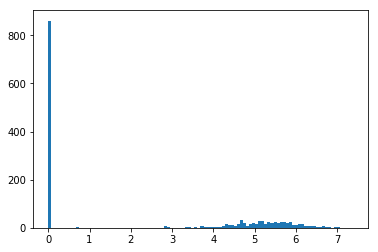

outliers number=713, percentage of all dataset=48.84%
outliers for more than one feature: outliers number=237, percentage of all dataset: 16.23

Performing one hot encoding for categorical features ..

Performing one hot encoding for categorical features ..


In [6]:
# Fill NA more carefully
def fillna_more_carefully(data):

    na_count = data.isnull().sum().sort_values(ascending=False)
    na_percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    na_data = pd.concat([na_count, na_percent], axis=1, keys=['NA count', 'NA percent'])
#     display(na_data.head(30))
    
#     print("before dropping na columns, number of columns={}".format(data.shape[1]))
    
    na_columns = na_data[na_data['NA percent'] > 0.10].index
    print("columns with more than 10% NA={}".format(na_columns))
    
    data = data.drop(labels=na_columns, axis=1) # , inplace=True
#     print("after dropping na columns, number of columns={}".format(data.shape[1]))
#     display(data.describe())
    
    return data
    
def preprocess_data_step_2_1(data_train, data_test):

    data_train = fillna_more_carefully(data_train)
    data_train = fillna_with_averages(data_train)
    
    data_test = fillna_more_carefully(data_test)
    data_test = fillna_with_averages(data_test)

    return data_train, data_test
    
def preprocess_data_step_2_2(data_train, data_test):

    data_train = one_hot(data_train)
    
    data_test = one_hot(data_test)

    data_train, data_test = reduce_to_common_columns(data_train, data_test)
    
    return data_train, data_test

print("")
print("Fill NA more carefully ..")

data_train_prep, data_test_prep = preprocess_data_step_2_1(data_train, data_test)

# Remove outliers
outliers_dict = {}
outliers_dup_dict = {}

data_train_prep_y = pd.concat([data_train_prep, y_log], axis=1)

def to_log(data, columns):
    for feature in columns:
        data[feature] = np.log1p(data[feature])

def get_outliers_rows(data_train_prep_y):
    # For each feature find the data points with extreme high or low values
    numeric_cols = data_train_prep_y._get_numeric_data().columns
    for feature in numeric_cols:

        # Calculate Q1 (25th percentile of the data) for the given feature
        Q1 = np.percentile(data_train_prep_y[feature], 25)

        # Calculate Q3 (75th percentile of the data) for the given feature
        Q3 = np.percentile(data_train_prep_y[feature], 75)

        # Use the interquartile range to calculate an outlier step 
        step = 2.1 * (Q3 - Q1)

        # Display the outliers
#         print("Data points considered outliers for the feature '{}':".format(feature))
        outliers_data = data_train_prep_y[~((data_train_prep_y[feature] >= Q1 - step) & (data_train_prep_y[feature] <= Q3 + step))]
        #outliers_indexes.extend(outliers_log_data.index.values)
        for index in outliers_data.index.values:
            outliers_dict[index] = outliers_dict[index] + 1 if index in outliers_dict else 1
#         print("len(outliers_dict)={}".format(len(outliers_dict)))
#         display(outliers_data.shape)

    outliers_dup_dict = {k : v for k,v in outliers_dict.items() if v > 1}

    print("outliers number={}, percentage of all dataset={:.2f}%".format(len(outliers_dict), len(outliers_dict)/len(data_train_prep_y)*100))

    # OPTIONAL: Select the indices for data points you wish to remove
    outliers  = list(outliers_dup_dict.keys())
    print("outliers for more than one feature: outliers number={}, percentage of all dataset: {:.2f}".format(len(outliers), len(outliers)/len(data_train_prep_y)*100))
    
    return outliers

most_important_columns.remove("SalePrice")

print("Histograms for most important features={}".format(most_important_columns))
for feature in most_important_columns:
    draw_histogram(data_train_prep, feature)

# Manually selected features that requre transforming to log. 
columns_to_log = ["GrLivArea", "GarageArea", "TotalBsmtSF", "1stFlrSF", "YearBuilt", "GarageYrBlt", "MasVnrArea"]
print("Manually selected features that requre tran to log={}".format(columns_to_log))

# Transforming manually selected features to log.   
print("Transforming manually selected features to log ..")
to_log(data_train_prep, columns_to_log)
to_log(data_test_prep, columns_to_log)

print("Histograms for manually selected features={}".format(most_important_columns))
for feature in columns_to_log:
    draw_histogram(data_train_prep, feature)

outliers = get_outliers_rows(data_train_prep_y)  

data_train_prep, data_test_prep = preprocess_data_step_2_2(data_train_prep, data_test_prep)

data_train_prep.drop(outliers, axis=0, inplace=True)
y_log.drop(outliers, axis=0, inplace=True)

# print("data_train_prep.shape[1]={}, data_test_prep.shape[1]={}".format(data_train_prep.shape[1], data_test_prep.shape[1]))


In [7]:
# write into a CSV file preprocessed data
data_train_prep_y = pd.concat([data_train_prep, y_log], axis=1)
data_train_prep_y.to_csv('train-prep.csv', index=False)

In [8]:
X_train, X_test, y_train_log, y_test_log = train_test_split(data_train_prep, y_log, test_size = 0.25, random_state = 42)

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

# regressor = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8), n_estimators=200, learning_rate=0.5,
#                               loss="square", random_state=42)

# parameters = {
#     'n_estimators' : [25, 50, 100, 200], 
#     'learning_rate' : [0.1, 0.5, 1.0, 1.5]
# }
#    'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=3)],


# scorer = make_scorer(mean_squared_log_error)
# grid_obj = GridSearchCV(regressor, parameters, scorer)
# grid_fit = grid_obj.fit(X_train, y_train_log)

# Get the estimator
# best_regressor = grid_fit.best_estimator_
# print("best_regressor={}".format(best_regressor))

# regressor = best_regressor

def fit_predict_print_metrics(regressors, X_train, X_test, y_train_log, y_test_log):

    for regressor, name in regressors:
        regressor.fit(X_train, y_train_log)

        y_pred_test_log = predict_and_fix(regressor, X_test)
        y_pred_train_log = predict_and_fix(regressor, X_train)

        y_pred_test_abs = np.expm1(y_pred_test_log)
        y_pred_train_abs = np.expm1(y_pred_train_log)
        y_test_abs = np.expm1(y_test_log)
        y_train_abs = np.expm1(y_train_log)

        print_metrics(y_pred_test_abs, y_test_abs, name + " log, y_test")
        print_metrics(y_pred_train_abs, y_train_abs, name + " log, y_train")

adaBoost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8), n_estimators=200, learning_rate=0.5,
                              loss="square", random_state=42)
randomForest = RandomForestRegressor(random_state=42)
gradientBoost = GradientBoostingRegressor(n_estimators=200, min_samples_leaf=2, max_features=226, random_state=42)
# gradientBoost = GradientBoostingRegressor(random_state=42)
linearRegression = LinearRegression()
        
regressors = [(adaBoost, "AdaBoostRegressor"),
              (randomForest, "RandomForestRegressor"),
              (gradientBoost, "GradientBoostingRegressor"),
              (linearRegression, "LinearRegression")]

fit_predict_print_metrics(regressors, X_train, X_test, y_train_log, y_test_log)

regressor = gradientBoost


-- AdaBoostRegressor log, y_test --
root_mean_squared_log_error=0.12317
Mean Abs Error=15174.59343
R2 score=0.87715

-- AdaBoostRegressor log, y_train --
root_mean_squared_log_error=0.03506
Mean Abs Error=4433.66590
R2 score=0.99263

-- RandomForestRegressor log, y_test --
root_mean_squared_log_error=0.12983
Mean Abs Error=16846.61804
R2 score=0.84995

-- RandomForestRegressor log, y_train --
root_mean_squared_log_error=0.06324
Mean Abs Error=7217.48592
R2 score=0.97721

-- GradientBoostingRegressor log, y_test --
root_mean_squared_log_error=0.11218
Mean Abs Error=13768.03701
R2 score=0.91167

-- GradientBoostingRegressor log, y_train --
root_mean_squared_log_error=0.05067
Mean Abs Error=6666.17173
R2 score=0.98269

-- LinearRegression log, y_test --
root_mean_squared_log_error=0.12629
Mean Abs Error=13774.47231
R2 score=0.90658

-- LinearRegression log, y_train --
root_mean_squared_log_error=0.07714
Mean Abs Error=9797.17099
R2 score=0.95805


In [9]:
# -*- coding: utf-8 -*-
"""
@author: Faron
from https://www.kaggle.com/mmueller/stacking-starter/code
"""
import numpy as np
import xgboost as xgb
from sklearn.model_selection import KFold

NFOLDS = 4
SEED = 42
NROWS = None

kf = KFold(n_splits=NFOLDS, shuffle=True, random_state=SEED)

class SklearnWrapper(object):
    def __init__(self, clf, seed=0, params=None):
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)

    def name(self):
        return type(self.clf).__name__

class XgbWrapper(object):
    def __init__(self, seed=0, params=None):
        self.param = params
        self.param['seed'] = seed
        self.nrounds = params.pop('nrounds', 250)

    def train(self, x_train, y_train):
        dtrain = xgb.DMatrix(x_train, label=y_train)
        self.gbdt = xgb.train(self.param, dtrain, self.nrounds)

    def predict(self, x):
        return self.gbdt.predict(xgb.DMatrix(x))

    def name(self):
        return type(self.gbdt).__name__

def get_oof(clf, x_train, y_train, x_test):

    ntrain = x_train.shape[0]
    ntest = x_test.shape[0]

    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):

        # print("train_index={}".format(train_index))
        # print("test_index={}".format(test_index))

        x_tr = x_train.iloc[train_index]
        y_tr = y_train.iloc[train_index]
        x_te = x_train.iloc[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [10]:
# ---- stacking ensemble ---------------
# import stacking as stk

models = list()
models.append(XgbWrapper(seed=42, params={"random_state": 42, "silent": 1}))
models.append(SklearnWrapper(clf=GradientBoostingRegressor,
                        seed=42, params={"n_estimators": 200, "min_samples_leaf": 2,
                                         "max_features": 226, "random_state": 42}))
models.append(SklearnWrapper(clf=LinearRegression, seed=42, params={}))

oof_train_list = list()
oof_test_list = list()

# X_train, X_test, y_train_log, y_test_log = train_test_split(data_train_prep, y_log, test_size = 0.25, random_state = 42)

# y_test_abs = np.expm1(y_test_log)
y_abs = np.expm1(y_log)
# y_train_abs = np.expm1(y_train_log)

for model in models:
    oof_train, oof_test = get_oof(model, data_train_prep, y_log, data_test_prep)
#     oof_train, oof_test = get_oof(model, X_train, y_train_log, X_test)
    oof_train_list.append(oof_train)
    oof_test_list.append(oof_test)

#     print_metrics(np.expm1(oof_test), y_test_abs, model.name() + " in stacking log, y_test")
    print_metrics(np.expm1(oof_train), y_abs, model.name() + " in stacking log, y_train")
#     print_metrics(np.expm1(oof_train), y_train_abs, model.name() + " in stacking log, y_train")

print("")
print("merge models into one ensemble model ..")

X_train_ensemble = np.concatenate(oof_train_list, axis=1)
X_test_ensemble = np.concatenate(oof_test_list, axis=1)

stk_regressor = LinearRegression()
name = "LinearRegression"
# regressor = GradientBoostingRegressor(n_estimators=200, min_samples_leaf=2, random_state=42)
stk_regressor.fit(X_train_ensemble, y_log)
# stk_regressor.fit(X_train_ensemble, y_train_log)

y_pred_test_log = predict_and_fix(stk_regressor, X_test_ensemble)
y_pred_train_log = predict_and_fix(stk_regressor, X_train_ensemble)

# y_pred_test_abs = np.expm1(y_pred_test_log)
# y_pred_train_abs = np.expm1(y_pred_train_log)

# print_metrics(np.expm1(y_pred_test_log), y_test_abs, name + " merge ensemble log, y_test")
print_metrics(np.expm1(y_pred_train_log), y_abs, name + " merge ensemble log, y_train")
# print_metrics(np.expm1(y_pred_train_log), y_train_abs, name + " merge ensemble log, y_train")



-- Booster in stacking log, y_train --
root_mean_squared_log_error=0.12914
Mean Abs Error=15843.66306
R2 score=0.88343

-- GradientBoostingRegressor in stacking log, y_train --
root_mean_squared_log_error=0.11524
Mean Abs Error=13880.27600
R2 score=0.90870

-- LinearRegression in stacking log, y_train --
root_mean_squared_log_error=0.12033
Mean Abs Error=13879.20775
R2 score=0.91438

merge models into one ensemble model ..

-- LinearRegression merge ensemble log, y_train --
root_mean_squared_log_error=0.10784
Mean Abs Error=12663.83867
R2 score=0.92463


In [11]:
# Predict the price for test data

print("Predict the price for test data for final submission..")
# y_pred_test_log = predict_and_fix(regressor, data_test_prep)
y_pred_test_abs = np.expm1(y_pred_test_log)

# submit final CSV file
submission = pd.DataFrame()
submission['Id'] = data_test['Id']
submission['SalePrice'] = y_pred_test_abs

print("")
print("final CSV file:")
display(submission.describe())
display(submission.head())

submission.to_csv('submission.csv', index=False)

Predict the price for test data for final submission..

final CSV file:


,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,175227.615127
std,421.321334,74933.011204
min,1461.000000,45471.567490
25%,1825.500000,125428.356661
50%,2190.000000,153760.757167
75%,2554.500000,207964.972847
max,2919.000000,741928.012222


,Id,SalePrice
0,1461,123888.507628
1,1462,170000.045257
2,1463,186597.995898
3,1464,195278.188816
4,1465,192164.287008
